# Teste A/B



### Explicação inicial

É muito comum no dia a dia de analista de dados o uso de testes A/B.

Vamos supor que voce trabalhe como analista de dados em uma empresa de e-commerce.


Por exemplo:
 - Equipes de Design e experiência do usuário (UX) lançam novos botões de adicionar ao carrinho no site e analisam o impacto do novo botão nas vendas dos produtos finais.
 - Equipes de marketing analisam o impacto da campanha A vs campanha B nas vendas


Nesses casos em que queremos analisar o impacto de uma medida ou então comparar uma nova funcionalidade é muito comum estruturarmos o que chamamos de um teste A/B para decidirmos qual a melhor medida.


Vamos agora analisar dados testes A/B realizados com campanhas de marketing em um e-commerce

### EXPERIMENTO:

- Suponha que queremos comparar os resultados de duas campanhas de marketing que foram realizadas ao mesmo tempo online em uma loja de e-commerce  

- Dividimos a campanha A para 50% do publico, com base no tráfego de cookies e a campanha B com outros 50%.

- Ambas as campanhas duraram 90 dias


- Metricas Que Iremos Analisar:
   - CTR : " click through rate" número de cliques / número de vezes que a propaganda apareceu
   - CR :  "conversion rate" número de clientes que compraram o produto / número de clinetes que viram a propaganda
   - CPC :  custo por clique
   - CPA : custo por aquisição.



Níveis de significancia que utilizaremos:
- α = 0.05
- β = 0.2

Médias das métricas atuais da empresa:
- CTR: 1%
- CR: 0.5%
- Variancia do CR: 10
- CPC: 0.20 USD
- CPA: 0.75 USD

MDE: 15%
(MDE = Minimum detactable effect) Esperamos detectar no minimo 15% de diferença na media de CR.

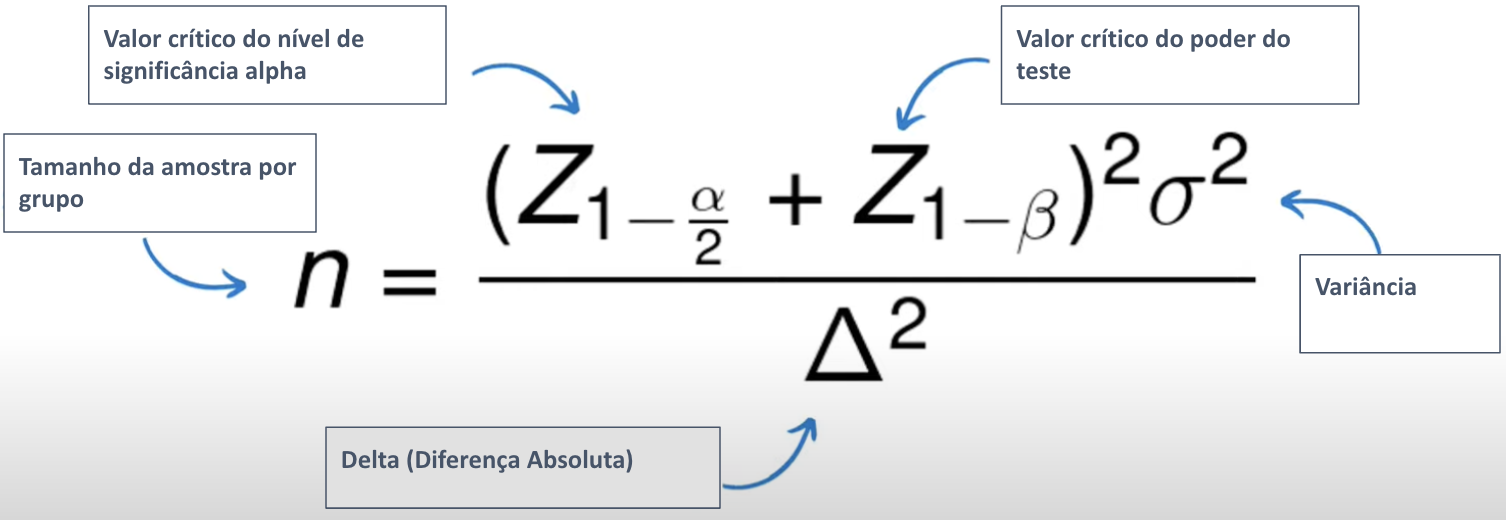

 Antes de comecarmos vamos fazer a leitura dos pacotes necessários

In [ ]:
### para manipulação dos dados em python
import pandas as pd
import numpy as np

### para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt

### para obter estatisticas de teste
from scipy import stats

### Vamos calcular o tamanho da amostra

In [ ]:
#####INPUTS

### Z(1-alpha/2)
alpha = 0.05
alpha_zscore =stats.norm.ppf(1-alpha/2)
print("Z(1-alpha/2): {}".format(str(alpha_zscore)))

### Z (1 - beta)
beta = 0.2
beta_zscore =stats.norm.ppf(1-beta)
print("Z(1-beta): {}".format(str(beta_zscore)))

### variancia

var = 2*10
print("Variancia estimada: {}".format(str(var)))

### baseline CR
baseline_cr = 0.5
print("CR (taxa de conversao base): {}".format(str(baseline_cr)))

### nova CR considerando o MDE
mde = 0.15
new_cr = baseline_cr*(1+mde)
print("CR (taxa de conversao esperada): {}".format(str(new_cr)))

### delta

delta = (new_cr - baseline_cr)**2
print("delta: {}".format(str(delta)))

Z(1-alpha/2): 1.959963984540054
Z(1-beta): 0.8416212335729143
Variancia estimada: 20
CR (taxa de conversao base): 0.5
CR (taxa de conversao esperada): 0.575
delta: 0.005624999999999994


In [ ]:
##### Formula

n = (((alpha_zscore + beta_zscore)**2)*var)/delta
print(" Amostra necessária para um grupo: {}".format(str(n)))

print(" Amostra necessária para o teste A/B: {}".format(str(2*n)))


 Amostra necessária para um grupo: 27907.127944352345
 Amostra necessária para o teste A/B: 55814.25588870469


Precisaremos de 55815 dados para conseguirmos notar um efeito de 5% de aumento de conversão do botão com 95% de confianca e 80% de poder do teste

## Analisando resultados de um teste A/B

In [ ]:
## lendo os dados
test = pd.read_csv("./test_group.csv", sep = ";")
control = pd.read_csv("./control_group.csv",sep = ";")

In [ ]:
## vendo as primeiras 5 linhas
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [ ]:
### vendo as primeiras 5 linhas
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
### analisando as estatisticas descritivas
test.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [ ]:
### analisando as estatisticas descritivas
control.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [ ]:
### verificando a quantidade de dados
test.shape

(30, 10)

In [ ]:
### verificando a quantidade de dados
control.shape

(30, 10)

Podemos perceber que nesse data frame os dados estão agregados por dias, desse modo 30 nao representa o numero de data points, e sim os numeros totais agregados

Vamos verificar se temos dados necessários para chegar a conclusoes (55k dados).
Para tanto podemos identificar quantos individuos foram atingidos pelas campanhas de marketing utilizando a variável Reach

In [ ]:
test["Reach"].sum() ### tivemos uma campanha atingindo 1.6 milhoes de usuarios na base de teste

1604747

In [ ]:
control["Reach"].sum() ### tivemos uma campanha atingindo 2.6 milhoes de usuarios na base de controle

2576503.0

Sendo assim podemos utilizar os dados mencionados

### Analise visual

Primeiro vamos calcular as métricas mencionadas para cada uma das bases

In [ ]:
#### calculo agregado

#### controle
control_avg_CTR = control['# of Website Clicks'].sum()/control['# of Impressions'].sum()
control_avg_CR =  control['# of Purchase'].sum()/control['# of Website Clicks'].sum()
control_avg_CPC = control['Spend [USD]'].sum()/control['# of Website Clicks'].sum()
control_avg_CPA = control['Spend [USD]'].sum()/control['# of Purchase'].sum()

### teste
test_avg_CTR = test['# of Website Clicks'].sum()/test['# of Impressions'].sum()
test_avg_CR =  test['# of Purchase'].sum()/test['# of Website Clicks'].sum()
test_avg_CPC = test['Spend [USD]'].sum()/test['# of Website Clicks'].sum()
test_avg_CPA = test['Spend [USD]'].sum()/test['# of Purchase'].sum()

In [ ]:
print("Control CTR: {0} vs Test CTR: {1}".format(str(control_avg_CTR), str(test_avg_CTR)))
print("Control CR: {0} vs Test CR: {1}".format(str(control_avg_CR), str(test_avg_CR)))
print("Control CPC: {0} vs Test CPC: {1}".format(str(control_avg_CPC), str(test_avg_CPC)))
print("Control CPA: {0} vs Test CPA: {1}".format(str(control_avg_CPA), str(test_avg_CPA)))

Control CTR: 0.04856521381969783 vs Test CTR: 0.08087885646047631
Control CR: 0.09825473257162855 vs Test CR: 0.08640658672708183
Control CPC: 0.4449233002598783 vs Test CPC: 0.42488810300049734
Control CPA: 4.528263307169712 vs Test CPA: 4.917311504764341


A principio para mesmos niveis de CPA e CPC, o grupo teste obteve maior CTR ,porem menor CR

Histogramas

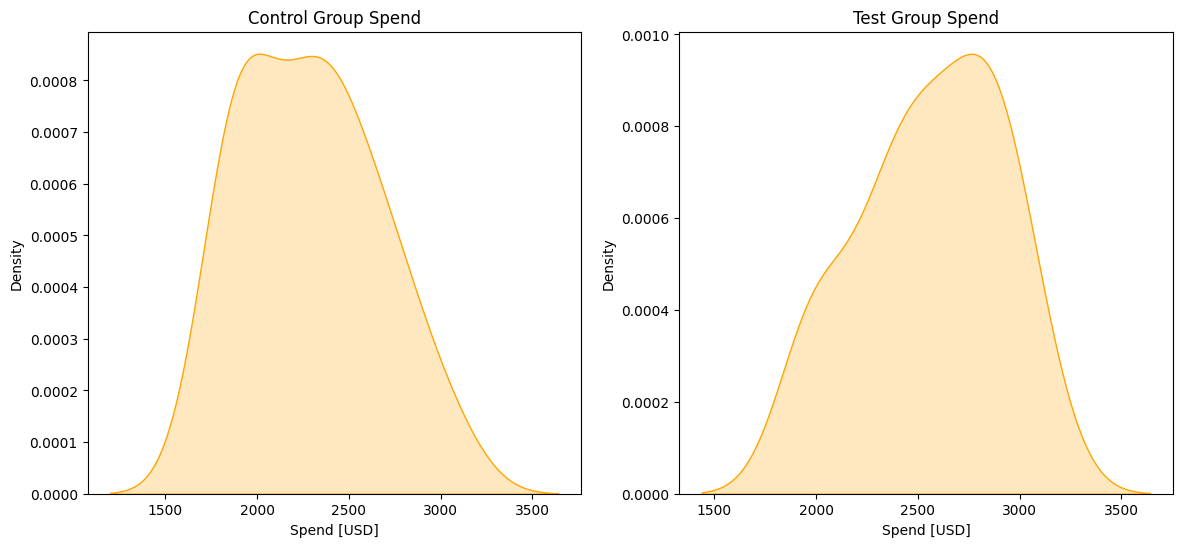

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

ax1 = sns.kdeplot(control['Spend [USD]'], ax=ax[0], color='orange', fill=True)
ax2 = sns.kdeplot(test['Spend [USD]'], ax=ax[1], color='orange', fill=True)
ax1.set_title('Control Group Spend')
ax2.set_title('Test Group Spend')

plt.show()

Nota-se que grupo de teste teve maiores gastos do que o grupo controle para a empresa

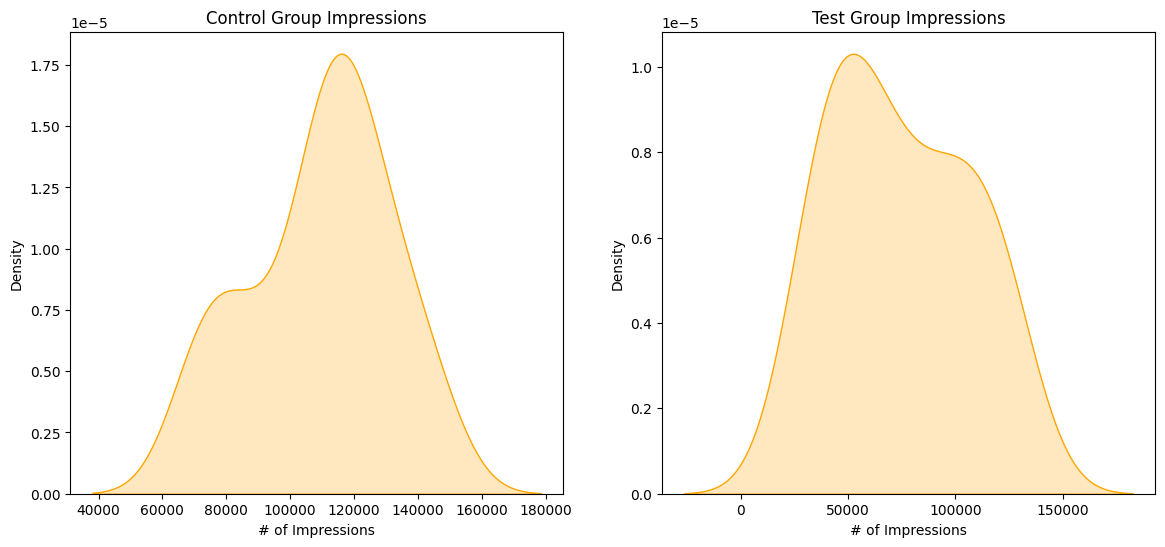

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

ax1 = sns.kdeplot(control['# of Impressions'], ax=ax[0], color='orange', fill=True)
ax2 = sns.kdeplot(test['# of Impressions'], ax=ax[1], color='orange', fill=True)
ax1.set_title('Control Group Impressions')
ax2.set_title('Test Group Impressions')

plt.show()

Em termos de impressoes, o grupo controle performou melhor, obtendo maiores numeros de impressoes com o pico mais a direita que o grupo teste

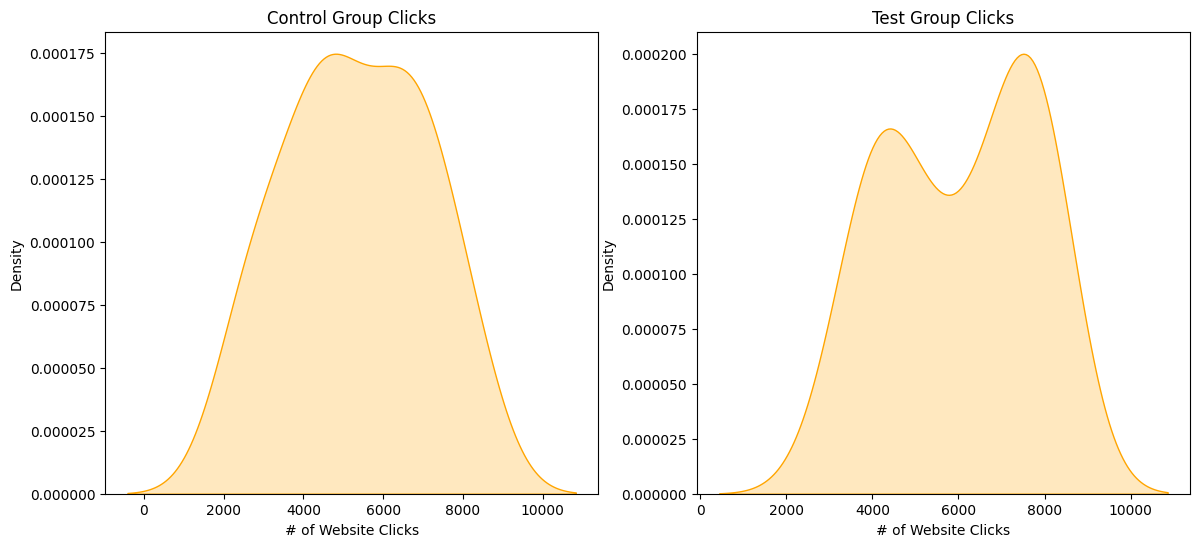

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

ax1 = sns.kdeplot(control['# of Website Clicks'], ax=ax[0], color='orange', fill=True)
ax2 = sns.kdeplot(test['# of Website Clicks'], ax=ax[1], color='orange', fill=True)
ax1.set_title('Control Group Clicks')
ax2.set_title('Test Group Clicks')

plt.show()

O grupo de teste teve mais cliques, tendo uma distribuicao bi-modal

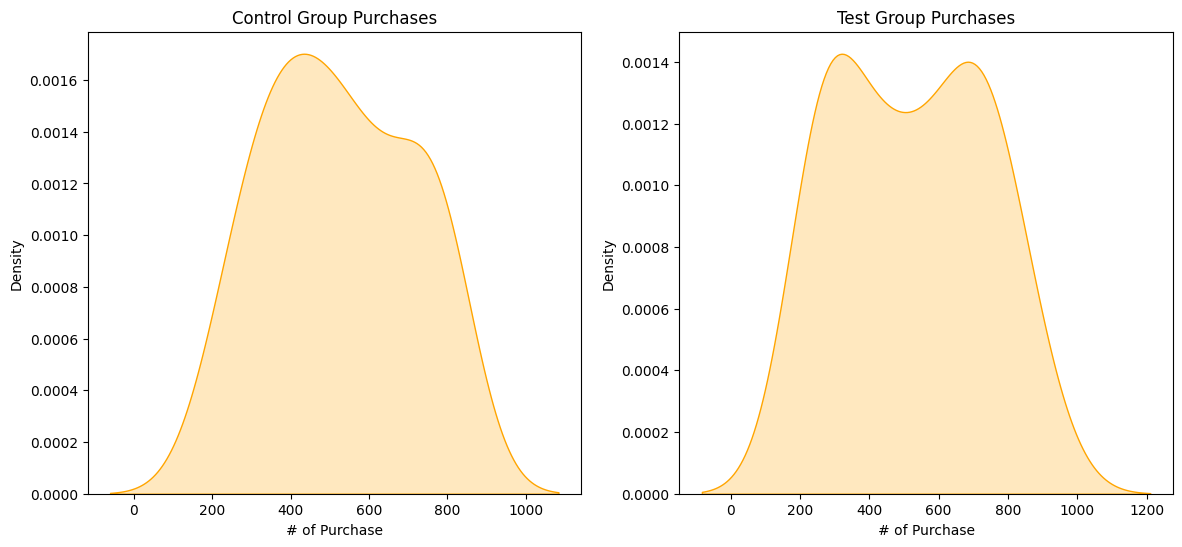

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

ax1 = sns.kdeplot(control['# of Purchase'], ax=ax[0], color='orange', fill=True)
ax2 = sns.kdeplot(test['# of Purchase'], ax=ax[1], color='orange', fill=True)
ax1.set_title('Control Group Purchases')
ax2.set_title('Test Group Purchases')

plt.show()

Nota-se que o grupo de teste obteve novamente uma distribuicao bi-modal